# Decision Tree for N-dimensional data and labels
The code below implements a decision tree calculated on all the data, for one label depending on several independent variables.

## Libraries
First, some libraries are loaded and global figure settings are made for exporting.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from math import log, e
import pylab

# Figure settings
F = pylab.gcf()
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

## Functions

In [3]:
def createClusters(means, covs, npoints):
    """
    Generate `npoints` random points within two clusters characteristed by their `mean` and `diagonal covariance`
    # TODO generalize to return more than two clusters
    """
    x,y=[],[]
    for i in range(len(means)):
        x1,y1=np.random.multivariate_normal(means[i], covs[i], npoints).T
        x.append(np.array(x1))
        y.append(np.array(y1))
    return x,y

# cluster parameters
mean1 = [18, 30]
cov1 = [[1, 0], [0, 1]]  # diagonal covariance
mean2 = [15, 40]
cov2 = [[2, 0], [0, 2]]  # diagonal covariance

means=[mean1,mean2]
covs=[cov1,cov2]
npoints=50

x,y=createClusters(means,covs,npoints)
x[0]

array([ 16.67697783,  17.95065435,  16.48403091,  18.23575896,
        18.29821359,  16.43861838,  18.17962234,  18.74683308,
        18.88595947,  17.5939642 ,  17.88449391,  18.40591633,
        16.6406721 ,  17.97862787,  18.97659769,  19.89292479,
        19.01841785,  18.00065074,  16.61898571,  16.70297056,
        18.03884899,  18.91599559,  18.18289595,  18.35406875,
        18.28233621,  19.75480516,  17.31484061,  16.09314778,
        16.35794827,  17.41851967,  18.42482213,  17.90274977,
        17.4949067 ,  16.90187518,  18.27112204,  17.71653454,
        19.15822431,  16.79874503,  17.0260756 ,  18.14901647,
        17.27679769,  19.25555168,  20.02255795,  17.48646893,
        18.83315091,  17.70912027,  17.24691801,  18.94449506,
        18.47518633,  18.7994352 ])

In [4]:
def createTwoClusters(mean1, mean2, cov1, cov2, npoints):
    """
    Generate `npoints` random points within two clusters characteristed by their `mean` and `diagonal covariance`
    # TODO generalize to return more than two clusters
    """
    x1, y1 = np.random.multivariate_normal(mean1, cov1, npoints).T
    x2, y2 = np.random.multivariate_normal(mean2, cov2, npoints).T
    return x1, y1, x2, y2


def plotData(clusters):
    """
    Plot the clustered data
    """
    for c in clusters:
        plt.plot(c[:,0], c[:,1], 'x')
    plt.axis('equal')
    plt.grid()
    plt.savefig('/Users/cyrilwendl/Documents/EPFL/Projet SIE/SIE-Project/random_data.pdf', bbox_inches='tight')
    plt.show()


def entropy(labels, base=None):  # [1]
    """
    Calculate the entropy for a set of labels
    """
    value, counts = np.unique(labels, return_counts=True)
    norm_counts = counts / counts.sum()
    base = e if base is None else base
    return -(norm_counts * np.log(norm_counts) / np.log(base)).sum()

def differentialEntropy():
    """
    # TODO implement: Gaussian entropy for continuous variables
    """
    pass
    

def split(index, value, dataset):  # [2]
    """
    split a dataset (columns: variables, rows: data) in two according to some column (index) value 
    """
    left, right = list(), list()
    for row in dataset:
        if row[index] < value:
            left.append(row)
        else:
            right.append(row)
    return left, right

def entropy_discrete(dataset, col_index):
    """
    calculate the entropy values for all cuts on one attribute (left<cut, right>=cut).
    
    Parameters
    ----------
    dataset :
        Input array with data and label in rows. The last column contains the labels.
    col_index :
        The index of the column for which the entropy should be computed.
    """
    x_vals, entropy_vals = list(), list()
    uniquevals=(np.unique(dataset[:,col_index]))
    for split_x in uniquevals[1:]:
        x_vals.append(split_x)

        # split
        left, right = split(col_index, split_x, dataset)
        left = np.asarray(left)
        right = np.asarray(right)

        # labels
        left_labels = left[:, -1]  # last column = labels
        right_labels = right[:, -1]

        # entropy
        left_entropy = entropy(left_labels, base=2)
        right_entropy = entropy(right_labels, base=2)

        # total entropy for attribute
        entropy_attr_split = left_entropy * len(left) / len(dataset) + right_entropy * len(right) / len(dataset)
        entropy_vals.append(entropy_attr_split)

    return entropy_vals, x_vals


## Test Data
Next, some data is generated to test the functions above.

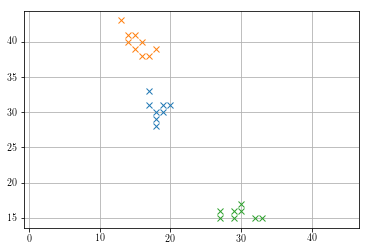

In [5]:
# cluster parameters
npoints=50
means=[[18, 30],[15, 40],[30,15]]
covs=[[[1, 0], [0, 1]],[[2, 0], [0, 2]],[[2, 0], [0, 2]]]
npoints=10

x,y=createClusters(means,covs,npoints)

# zip for having tuples (x,y), round and unique for having discrete coordinates (eliminating duplicate points)
clusters=[]
for i in range(len(x)):
    clusters.append(np.unique(np.round(list(zip(x[i],y[i],np.ones(len(x[i]))*(i+1)))),axis=0)) # np.ones: label 1 for first cluster

# connect unique points of cluster 1 and cluster 2
dataset=np.asarray(np.concatenate(clusters,axis=0))
plotData(clusters)

In [6]:
pd.DataFrame(dataset)

,0,1,2
0,17.0,31.0,1.0
1,17.0,33.0,1.0
2,18.0,28.0,1.0
3,18.0,29.0,1.0
4,18.0,30.0,1.0
5,19.0,30.0,1.0
6,19.0,31.0,1.0
7,20.0,31.0,1.0
8,13.0,43.0,2.0
9,14.0,40.0,2.0


Next, we can calculate the entropy for one given attribute:

In [7]:
def calc_entropy_attribute(dataset):
    dfs=[]#pd.DataFrame(columns=(["x","y"])
    entropy_attr=[]
    x_attr=[]
    attributes=["x","y"]

    for attribute_ind in range(np.shape(dataset,)[1]-1):
        entropy_vals_attr, xs_vals_attr = entropy_discrete(col_index=attribute_ind, dataset=dataset)
        x_attr.append(xs_vals_attr)
        entropy_attr.append(np.asarray(entropy_vals_attr))

        df=pd.DataFrame(x_attr[attribute_ind], entropy_attr[attribute_ind])
        df.reset_index(inplace=True)
        df.columns=(["entropy","cut value"])
        dfs.append(df)

    return entropy_attr,x_attr,dfs

entropy_attr,x_attr,dfs=calc_entropy_attribute(dataset)
dfs[1] # y data

[[ 17.  31.   1.]
 [ 17.  33.   1.]
 [ 18.  28.   1.]
 [ 18.  29.   1.]
 [ 18.  30.   1.]
 [ 19.  30.   1.]
 [ 19.  31.   1.]
 [ 20.  31.   1.]
 [ 13.  43.   2.]
 [ 14.  40.   2.]
 [ 14.  41.   2.]
 [ 15.  39.   2.]
 [ 15.  41.   2.]
 [ 16.  38.   2.]
 [ 16.  40.   2.]
 [ 17.  38.   2.]
 [ 18.  39.   2.]
 [ 27.  15.   3.]
 [ 27.  16.   3.]
 [ 29.  15.   3.]
 [ 29.  16.   3.]
 [ 30.  16.   3.]
 [ 30.  17.   3.]
 [ 32.  15.   3.]
 [ 33.  15.   3.]]


,entropy,cut value
0,1.268374,16.0
1,0.901173,17.0
2,0.678302,28.0
3,0.813941,29.0
4,0.871342,30.0
5,0.903838,31.0
6,0.785673,33.0
7,0.640000,38.0
8,1.002346,39.0
9,1.217542,40.0


We now want to get the variable for which the minimum entropy is lowest and make a cut there. Then continue on recursively until all labels are in the same split subarrays.

In [8]:
def get_best_attr(dfs):
    dfs[0].entropy.min()
    min_val=2 # over value range [0,1], min < min_vals will be necessarily true during first evaluation
    min_val_cut=np.nan
    min_var=np.nan
    for i in range(len(dfs)):
        df=dfs[i]
        min_df=df.loc[df['entropy'].argmin()]
        if min_df["entropy"] < min_val:
            min_val = min_df["entropy"] 
            min_val_cut = min_df["cut value"] 
            min_var=i
            
    return min_val,min_val_cut,min_var

min_val,min_val_cut,min_var=get_best_attr(dfs)
df=pd.DataFrame(["lowest entropy","cut value","variable number"],[min_val,min_val_cut,min_var])
df.columns=["indicator"]
df

,indicator
0.64,lowest entropy
38.00,cut value
1.00,variable number


Now we can iterate the same procedure over the both splitted sides until there is no split left.

In [15]:
# get left (l) and right (r) based on split
# check if labels unique 
# get entropies for all split values in ll rr
# recurse
left,right=split(dataset=dataset,index=min_var,value=min_val_cut)
splits=[]
def next_split(left, right):
    for side in (left,right):
        labels=np.asarray(side)[:,2]
        side=np.asarray(side)
        if len(np.unique(np.asarray(side)[:,2])) != 1:
            print("will do recursion")
            entropy_attr,x_attr,dfs = calc_entropy_attribute(dataset=side) # get entropies for all attributes within side
            min_val,min_val_cut,min_var=get_best_attr(dfs) # get best split value
            left_new,right_new=split(dataset=side,index=min_var,value=min_val_cut)
            next_split(left_new,right_new) # split, recursion
        else:
            print("will do nothing")
            splits.append(side)
            
next_split(left,right)

will do recursion
[[ 17.  31.   1.]
 [ 17.  33.   1.]
 [ 18.  28.   1.]
 [ 18.  29.   1.]
 [ 18.  30.   1.]
 [ 19.  30.   1.]
 [ 19.  31.   1.]
 [ 20.  31.   1.]
 [ 27.  15.   3.]
 [ 27.  16.   3.]
 [ 29.  15.   3.]
 [ 29.  16.   3.]
 [ 30.  16.   3.]
 [ 30.  17.   3.]
 [ 32.  15.   3.]
 [ 33.  15.   3.]]
will do nothing
will do nothing
will do nothing


# TODO add code for continous entropy calculation